IMPORTAMOS LAS LIBRERIAS QUE UTILIZAREMOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


IMPORTAMOS EL DATASET

In [2]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape

(1460, 81)

LEEMOS LAS PRIMERAS LINEAS DEL DATASET

In [3]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Extraemos Columnas con NULOS

In [4]:
cols_con_na=[col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

TRAEMOS EL TIPO DE DATO DE LAS COLUMNAS CON NULOS

In [5]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

PARA ANALISIS TRAEMOS EL % DE NULOS DE LAS COLUMNAS QUE TIENEN NULOS

In [6]:
prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

DEFINIMOS TODAS LAS COLUMNAS CON UN % DE NULOS > AL 6% PARA ELIMINARLAS 

In [7]:
cols_drop=[col for col in dataHP.columns if (dataHP[col].isnull().mean()>0.06)]
cols_drop

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

*1RA IMPUTACION ELIMINAMOS TODAS LAS COLUMNAS CON % DE NAN > A 6%

In [8]:
dataHP_noNAN = dataHP.drop(cols_drop, axis=1)


REVALIDAMOS LA ELIMINACION DE COLUMNAS

In [9]:
cols_drop=[col for col in dataHP_noNAN.columns if (dataHP_noNAN[col].isnull().mean()>0.06)]
cols_drop

[]

DEFINIMOS TODAS LAS COLUMNAS CON UN % DE NULOS > 0

In [10]:
cols_rescatables=[col for col in dataHP_noNAN.columns if (dataHP_noNAN[col].isnull().mean()!=0)]
cols_rescatables

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

COMPARAMOS EL ARCHIVO DataHP ORIGINAL VS SIN NULLS

In [11]:
dataHP.shape,dataHP_noNAN.shape

((1460, 81), (1460, 75))

VISUALIZAMOS LAS COLUMNAS CON % DE NULLS ENTRE 0 Y 6 Y REVALIDAMOS SI SON CATEGORICOS O NUMERICOS

In [12]:
df_rescatables = dataHP_noNAN[cols_rescatables].copy()
tipos_de_datos = df_rescatables.dtypes
print(tipos_de_datos)


MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


EXTRAEMOS MEDIA Y MEDIANA DE LAS VARIABLES NUMERICAS

In [13]:
media_garage = df_rescatables['GarageYrBlt'].mean()
mediana_garage = df_rescatables['GarageYrBlt'].median()
print(f"media de GarageYrBlt: {(media_garage)}")
print(f"mediana de GarageYrBlt: {(mediana_garage)}")

media_mas = df_rescatables['MasVnrArea'].mean()
mediana_mas = df_rescatables['MasVnrArea'].median()
print(f"media de MasVnrArea: {(media_mas)}")
print(f"mediana de MasVnrArea: {(mediana_mas)}")


media de GarageYrBlt: 1978.5061638868744
mediana de GarageYrBlt: 1980.0
media de MasVnrArea: 103.68526170798899
mediana de MasVnrArea: 0.0


CREAMOS 2 NUEVAS COLUMNAS PARA LAS VARIABLES NUMERICAS Y REEMPLAZAMOS LOS NANs CON LAS MEDIAS

In [14]:
dataHP_noNAN['GarageYrBlt_mean']=np.round(dataHP_noNAN['GarageYrBlt'].fillna(media_garage))
dataHP_noNAN['MasVnrArea_mean']=np.round(dataHP_noNAN['MasVnrArea'].fillna(media_mas))
dataHP_noNAN

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_mean,MasVnrArea_mean
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2003.0,196.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1976.0,0.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2001.0,162.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1998.0,0.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,2000.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1999.0,0.0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1978.0,119.0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1941.0,0.0
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1950.0,0.0


COMPARAMOS LAS VARIABLES CREADAS Y LAS ORIGINALES

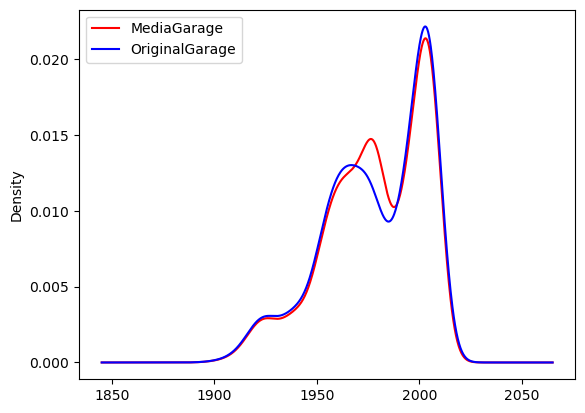

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataHP_noNAN['GarageYrBlt_mean'].plot.density(color='red', label='MediaGarage')
dataHP_noNAN['GarageYrBlt'].plot.density(color='blue', label='OriginalGarage')

ax.legend()

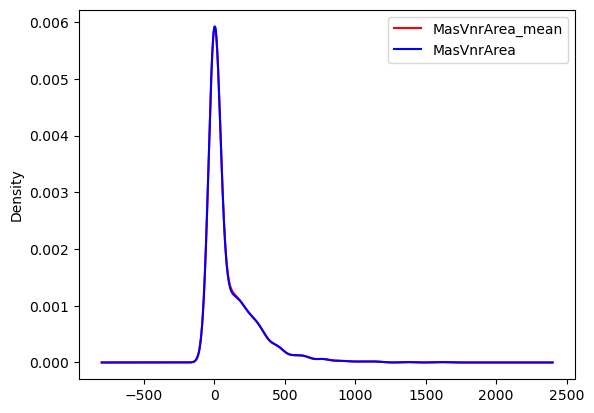

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)

dataHP_noNAN['MasVnrArea_mean'].plot.density(color='red', label='MasVnrArea_mean')
dataHP_noNAN['MasVnrArea'].plot.density(color='blue', label='MasVnrArea')

ax.legend()

VARIABLES CATEGORICAS

EXTRAEMOS LAS VARIABLES CATEGORICAS CON VALORES NULL

In [17]:
dataHP_noNAN1.isnull().mean()

NameError: name 'dataHP_noNAN1' is not defined

*2DA IMPUTACION - VARIABLES CATEGORICAS CON VALORES NaN

In [ ]:
dataHP_noNAN['MasVnrType'].value_counts()/len(dataHP_noNAN)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

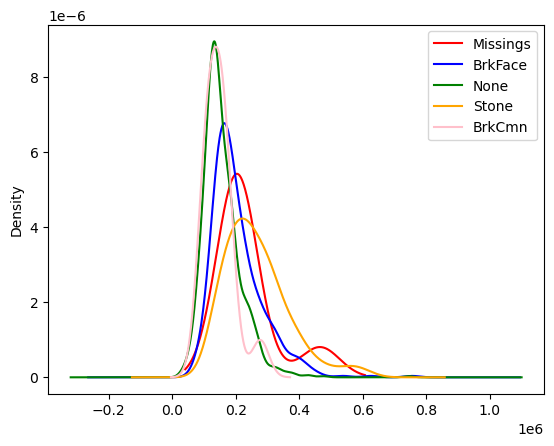

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataHP_noNAN[dataHP_noNAN['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataHP_noNAN[dataHP_noNAN['MasVnrType'] == 'Stone']['SalePrice'].plot(kind="kde", color="orange", label="Stone")
dataHP_noNAN[dataHP_noNAN['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="pink", label="BrkCmn")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['MasVnrType'].fillna('Stone',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['BsmtQual'].value_counts()/len(dataHP_noNAN)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

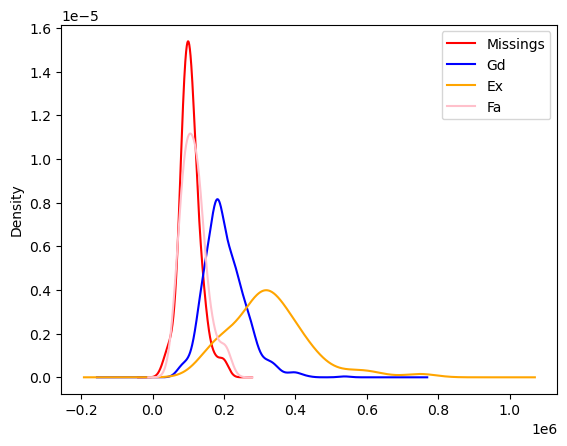

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP_noNAN[dataHP_noNAN['BsmtQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="orange", label="Ex")
dataHP_noNAN[dataHP_noNAN['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="pink", label="Fa")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['BsmtQual'].fillna('Fa',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['BsmtCond'].value_counts()/len(dataHP_noNAN)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

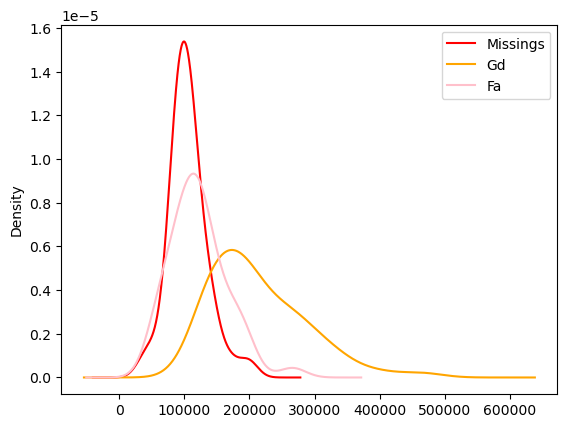

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataHP_noNAN[dataHP_noNAN['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="pink", label="Fa")

ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['BsmtCond'].fillna('Fa',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['BsmtExposure'].value_counts()/len(dataHP_noNAN)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

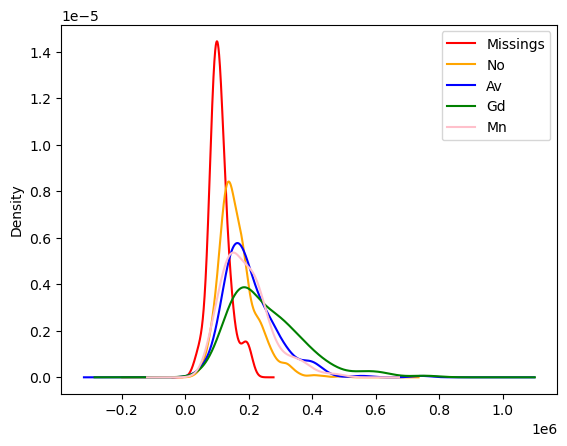

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="orange", label="No")
dataHP_noNAN[dataHP_noNAN['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="blue", label="Av")
dataHP_noNAN[dataHP_noNAN['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataHP_noNAN[dataHP_noNAN['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="pink", label="Mn")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['BsmtExposure'].fillna('Fa',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['BsmtFinType1'].value_counts()/len(dataHP_noNAN)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

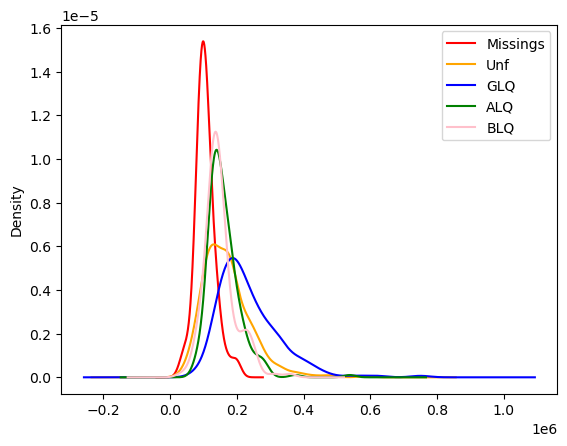

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataHP_noNAN[dataHP_noNAN['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="blue", label="GLQ")
dataHP_noNAN[dataHP_noNAN['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="green", label="ALQ")
dataHP_noNAN[dataHP_noNAN['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="pink", label="BLQ")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['BsmtFinType1'].fillna('BLQ',inplace=True)#Impuacion de variables categoricas


In [ ]:
dataHP_noNAN['BsmtFinType2'].value_counts()/len(dataHP_noNAN)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

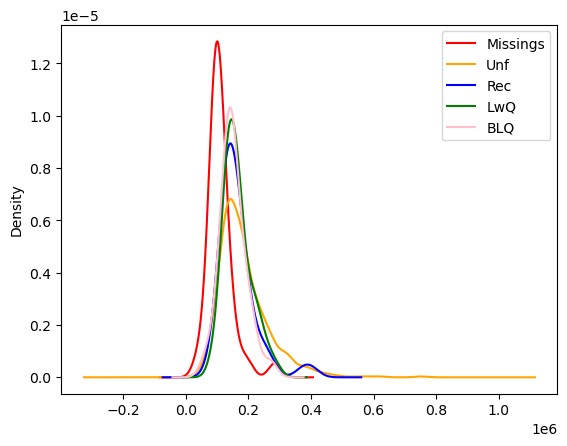

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataHP_noNAN[dataHP_noNAN['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="blue", label="Rec")
dataHP_noNAN[dataHP_noNAN['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="green", label="LwQ")
dataHP_noNAN[dataHP_noNAN['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="pink", label="BLQ")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['BsmtFinType2'].fillna('REC',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['GarageType'].value_counts()/len(dataHP_noNAN)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

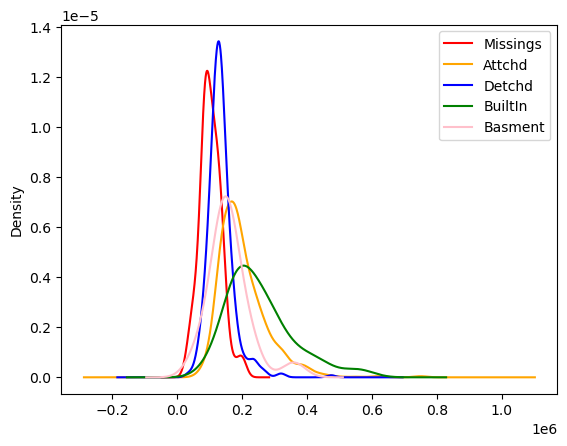

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="orange", label="Attchd")
dataHP_noNAN[dataHP_noNAN['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="blue", label="Detchd")
dataHP_noNAN[dataHP_noNAN['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="green", label="BuiltIn")
dataHP_noNAN[dataHP_noNAN['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="pink", label="Basment")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['GarageType'].fillna('Detchd',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['GarageFinish'].value_counts()/len(dataHP_noNAN)

Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

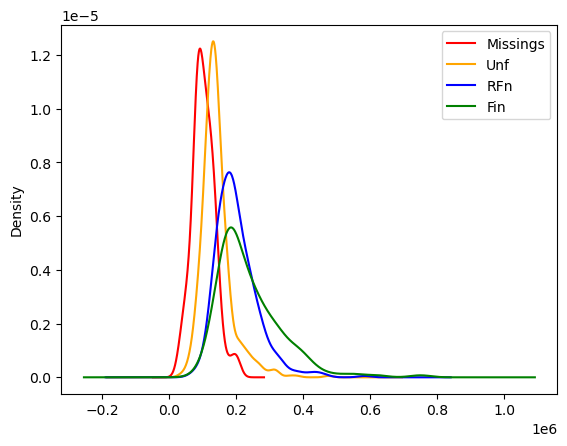

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="orange", label="Unf")
dataHP_noNAN[dataHP_noNAN['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="blue", label="RFn")
dataHP_noNAN[dataHP_noNAN['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="green", label="Fin")

ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['GarageFinish'].fillna('Unf',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['GarageQual'].value_counts()/len(dataHP_noNAN)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

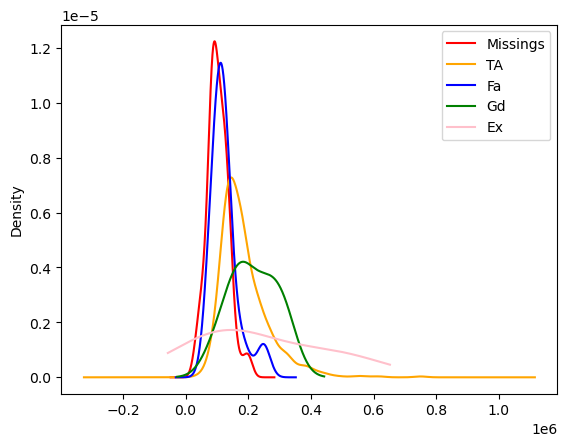

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['GarageQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['GarageQual'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataHP_noNAN[dataHP_noNAN['GarageQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
dataHP_noNAN[dataHP_noNAN['GarageQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataHP_noNAN[dataHP_noNAN['GarageQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="pink", label="Ex")
ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['GarageQual'].fillna('Fa',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['GarageCond'].value_counts()/len(dataHP_noNAN)

TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

In [ ]:
len(dataHP_noNAN[dataHP_noNAN['Electrical'].isnull()]['SalePrice'])
len(dataHP_noNAN[dataHP_noNAN['Electrical'].isnull()]['SalePrice'])

1

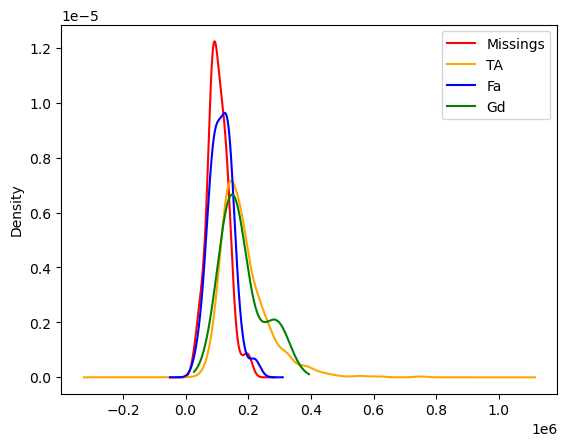

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

dataHP_noNAN[dataHP_noNAN['GarageCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['GarageCond'] == 'TA']['SalePrice'].plot(kind="kde", color="orange", label="TA")
dataHP_noNAN[dataHP_noNAN['GarageCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
dataHP_noNAN[dataHP_noNAN['GarageCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")

ax.legend()
plt.show()

In [ ]:
dataHP_noNAN['GarageCond'].fillna('Fa',inplace=True)#Impuacion de variables categoricas

In [ ]:
dataHP_noNAN['Electrical'].value_counts()/len(dataHP_noNAN)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

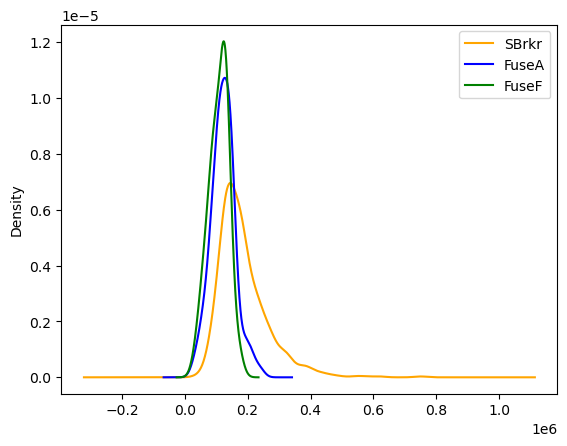

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) 

#dataHP_noNAN[dataHP_noNAN['Electrical'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP_noNAN[dataHP_noNAN['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="orange", label="SBrkr")
dataHP_noNAN[dataHP_noNAN['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="blue", label="FuseA")
dataHP_noNAN[dataHP_noNAN['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="green", label="FuseF")

ax.legend()
plt.show()

In [ ]:
len(dataHP_noNAN[dataHP_noNAN['Electrical'].isnull()]['SalePrice'])

1

In [ ]:
dataHP_noNAN['Electrical'].fillna('SBrkr',inplace=True)#Impuacion de variables categoricas

*3RA IMPUTACION, SUSTITUCION DE VARIABLES NUMERICAS CON NaN < AL 6% CON EL PROMEDIO DE ELLAS MISMAS

In [ ]:
dataHP_noNAN['GarageYrBlt']=np.round(dataHP_noNAN['GarageYrBlt_mean'].fillna(media_garage))
dataHP_noNAN['MasVnrArea']=np.round(dataHP_noNAN['MasVnrArea_mean'].fillna(media_mas))
dataHP_noNAN

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBlt_mean,MasVnrArea_mean
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2008,WD,Normal,208500,2003.0,196.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,5,2007,WD,Normal,181500,1976.0,0.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,9,2008,WD,Normal,223500,2001.0,162.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,2,2006,WD,Abnorml,140000,1998.0,0.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,12,2008,WD,Normal,250000,2000.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,8,2007,WD,Normal,175000,1999.0,0.0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,2,2010,WD,Normal,210000,1978.0,119.0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2500,5,2010,WD,Normal,266500,1941.0,0.0
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,4,2010,WD,Normal,142125,1950.0,0.0


COMPROBACION DEL DATASET IMPUTADO *dataHP_noNAN*

In [ ]:
cols_con_na1 = [col for col in dataHP_noNAN.columns if dataHP_noNAN[col].isnull().mean() > 0]
cols_con_na1

[]

In [ ]:
prop_nan_per_col1=dataHP_noNAN[cols_con_na1].isnull().mean()
prop_nan_per_col1

Series([], dtype: float64)